In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum() #checking for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# EDA

In [13]:
df['Jouney_day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['Jouney_month']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [15]:
pd.set_option('display.max_columns',None)

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jouney_day,Jouney_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
df.drop(['Date_of_Journey'],axis=1,inplace=True) #since we have introduced 2 new columns journey_day and journey_time we have removded Date_of_Journey

In [19]:
#Extracting values from Dep_time
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [20]:
#we can drop df.Dep_Time
df.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
#Extracting values from Arrival_Time
df['Arr_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_min']=pd.to_datetime(df.Arrival_Time).dt.minute

In [25]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [33]:
#Adding Duration hours and duration mins   
dur=list(df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

dur_hours = []
dur_mins = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    dur_mins.append(int(dur[i].split(sep = "m")[0].split()[-1])) #Extract mins from Duration

In [34]:
df['Duration_hours']=dur_hours
df['Duration_mins']=dur_mins

In [36]:
df.drop(['Duration'],axis=1,inplace=True)

In [37]:
# Handling Categorical Value

In [39]:
Airline_dict=dict(df['Airline'].value_counts())
print(Airline_dict)

{'Jet Airways': 3849, 'IndiGo': 2053, 'Air India': 1751, 'Multiple carriers': 1196, 'SpiceJet': 818, 'Vistara': 479, 'Air Asia': 319, 'GoAir': 194, 'Multiple carriers Premium economy': 13, 'Jet Airways Business': 6, 'Vistara Premium economy': 3, 'Trujet': 1}


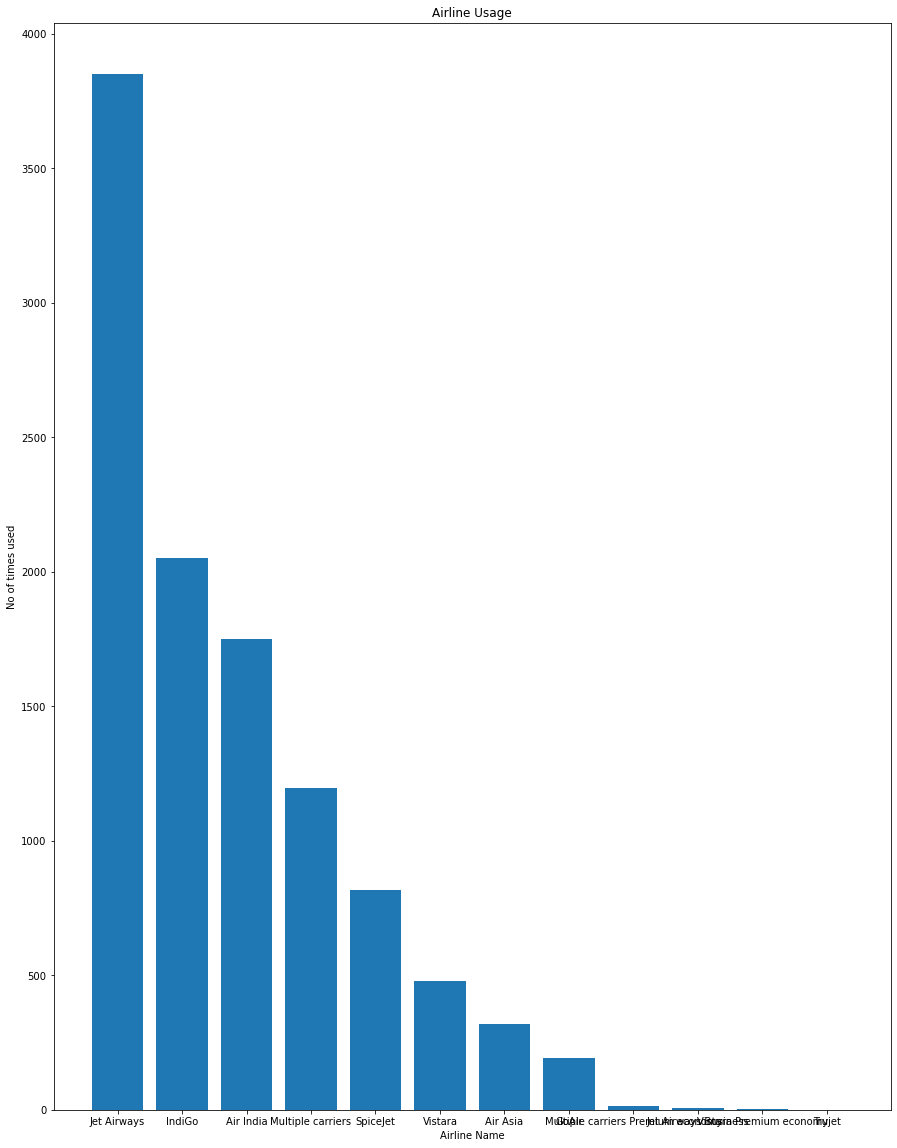

In [42]:
plt.figure(figsize=(15,20))
plt.title("Airline Usage")
plt.bar(Airline_dict.keys(),Airline_dict.values())
plt.xlabel("Airline Name")
plt.ylabel("No of times used")
plt.show()

Observation:
    From the above barplot , we can see that Jet Airways is the most used airline from the given dataset

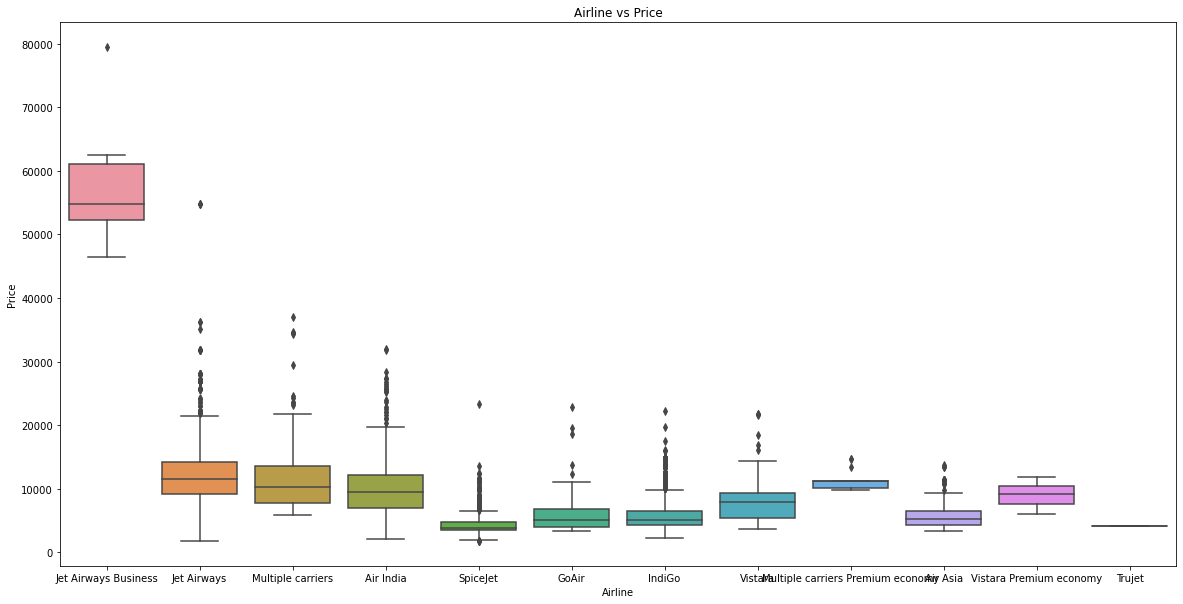

In [47]:
plt.figure(figsize=(20,10))
plt.title("Airline vs Price")
sns.boxplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False))
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

Observation:From the above diagram, we can see that most money spent on Jet Airways Business Airline, JetAirways

In [148]:
#One Hot Encoding for Airline
src=df['Source']
src=pd.get_dummies(src,drop_first=True)
src.rename(columns = {'Chennai':'Source_Chennai', 'Delhi':'Source_Delhi','Kolkata':'Source_Kolkata','Mumbai':'Source_Mumbai'}, inplace = True)
src.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [149]:
dest=df['Destination']
dest=pd.get_dummies(dest,drop_first=True)
dest.rename(columns = {'Cochin':'Destination_Cochin', 'Delhi':'Destination_Delhi','Hyderabad':'Destination_Hyderabad','Kolkata':'Destination_Kolkata','New Delhi':'Destination_New_Delhi'}, inplace = True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [51]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [52]:
#More than 8000 data points for additional_info was No Info . So we remove it
df.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [54]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [56]:
#As this is Ordinal Categorical Type we perform labelEncoder
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [146]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Jouney_day,Jouney_month,dep_hour,dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [147]:
Airline=df['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.isnull().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
dtype: int64

In [150]:
df_train=pd.concat([df,Airline,src,dest],axis=1)

In [152]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [155]:
df_train.head()

,Total_Stops,Price,Jouney_day,Jouney_month,dep_hour,dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Test Data

In [65]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [67]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [69]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arr_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arr_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [70]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [121]:
#one hot encoding
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Source.rename(columns = {'Chennai':'Source_Chennai', 'Delhi':'Source_Delhi','Kolkata':'Source_Kolkata','Mumbai':'Source_Mumbai'}, inplace = True)
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
Destination.rename(columns = {'Cochin':'Destination_Cochin', 'Delhi':'Destination_Delhi','Hyderabad':'Destination_Hyderabad','Kolkata':'Destination_Kolkata','New Delhi':'Destination_New_Delhi'}, inplace = True)
#test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [72]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [123]:
df_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [127]:
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [129]:
df_test.shape

(2671, 28)

In [156]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


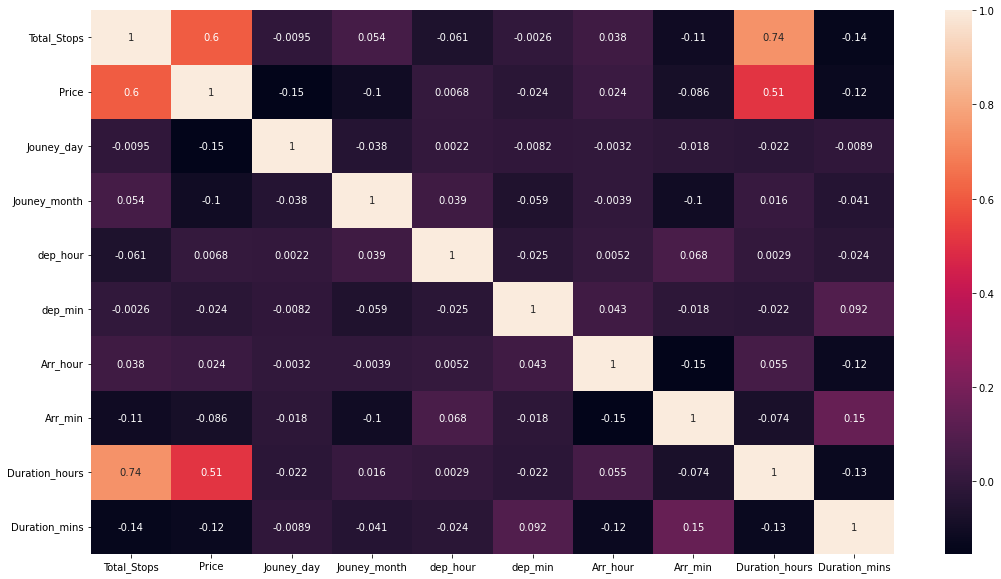

In [98]:
#heatmap to check the correlation beetween features
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observation:We can see that the No. of stops and durations hours are the most correlated to the Target Price. This makes total sense, the more stops and the longer the flight generally entails a higher price range

In [161]:
X=df_train.loc[:,['Total_Stops','Jouney_day', 'Jouney_month', 'dep_hour',
       'dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi']]
X.head()

,Total_Stops,Jouney_day,Jouney_month,dep_hour,dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [162]:
X.shape

(10682, 28)

In [95]:
y=df_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

ExtraTressRegressor from sklearn which will allows you to easily see what are the important features for the Price.

In [164]:
from sklearn.ensemble import ExtraTreesRegressor
model_reg = ExtraTreesRegressor()
model_reg.fit(X, y)

ExtraTreesRegressor()

In [165]:
model_reg.feature_importances_

array([2.05940999e-01, 1.42917310e-01, 5.39778167e-02, 2.42206891e-02,
       2.07672782e-02, 2.76517897e-02, 1.94072421e-02, 1.57524860e-01,
       1.82440835e-02, 7.91884954e-03, 2.22887615e-03, 1.97512578e-02,
       1.30470802e-01, 6.73995365e-02, 1.79508191e-02, 8.35635125e-04,
       3.42961637e-03, 4.52429407e-03, 8.03785073e-05, 4.06273017e-04,
       8.27296971e-03, 3.30694077e-03, 6.12564830e-03, 1.13365227e-02,
       1.28128794e-02, 7.07859812e-03, 4.82826613e-04, 2.49352081e-02])

In [166]:
fea=dict(zip(list(X.columns),model_reg.feature_importances_))
print(fea)

{'Total_Stops': 0.2059409991647704, 'Jouney_day': 0.14291730952711124, 'Jouney_month': 0.053977816653829926, 'dep_hour': 0.024220689077265614, 'dep_min': 0.020767278226998673, 'Arr_hour': 0.027651789667425944, 'Arr_min': 0.019407242140139076, 'Duration_hours': 0.15752485957627732, 'Duration_mins': 0.018244083545808105, 'Air India': 0.00791884953830363, 'GoAir': 0.002228876151603543, 'IndiGo': 0.019751257808346738, 'Jet Airways': 0.13047080239145167, 'Jet Airways Business': 0.06739953654327732, 'Multiple carriers': 0.01795081914122934, 'Multiple carriers Premium economy': 0.0008356351252495292, 'SpiceJet': 0.0034296163678648513, 'Vistara': 0.004524294070323268, 'Vistara Premium economy': 8.037850731829098e-05, 'Source_Chennai': 0.0004062730172319195, 'Source_Delhi': 0.008272969705046098, 'Source_Kolkata': 0.0033069407698708563, 'Source_Mumbai': 0.006125648303114512, 'Destination_Cochin': 0.011336522731941395, 'Destination_Delhi': 0.012812879439440416, 'Destination_Hyderabad': 0.00707859

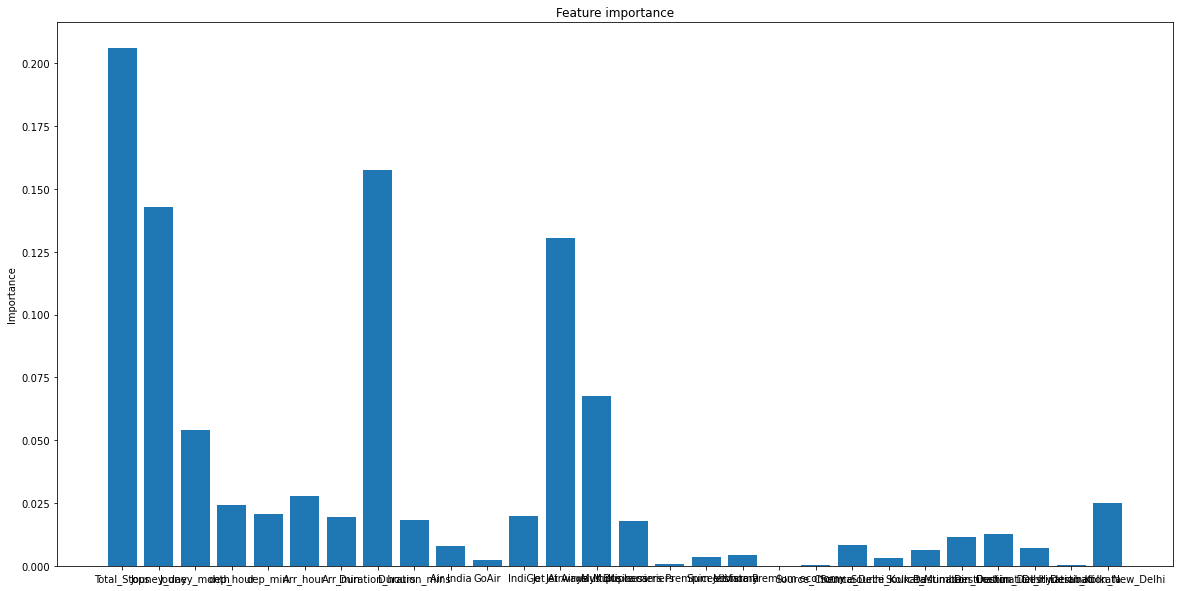

In [167]:
plt.figure(figsize=(20,10))
plt.title("Feature importance")
plt.bar(fea.keys(),fea.values())
plt.ylabel("Importance")
plt.show()

Observation:From the above diagram we can see that total_stops has ighest feature importance values

In [168]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [169]:
X.shape

(10682, 28)

In [170]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [171]:
y_pred_rf_regressor=rf_regressor.predict(X_test)

In [172]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [173]:
y_pred_xgb=xgb.predict(X_test)

In [175]:
print(rf_regressor.score(X_train,y_train))
print(xgb.score(X_train,y_train))

0.9573761000365778
0.9343067699101864


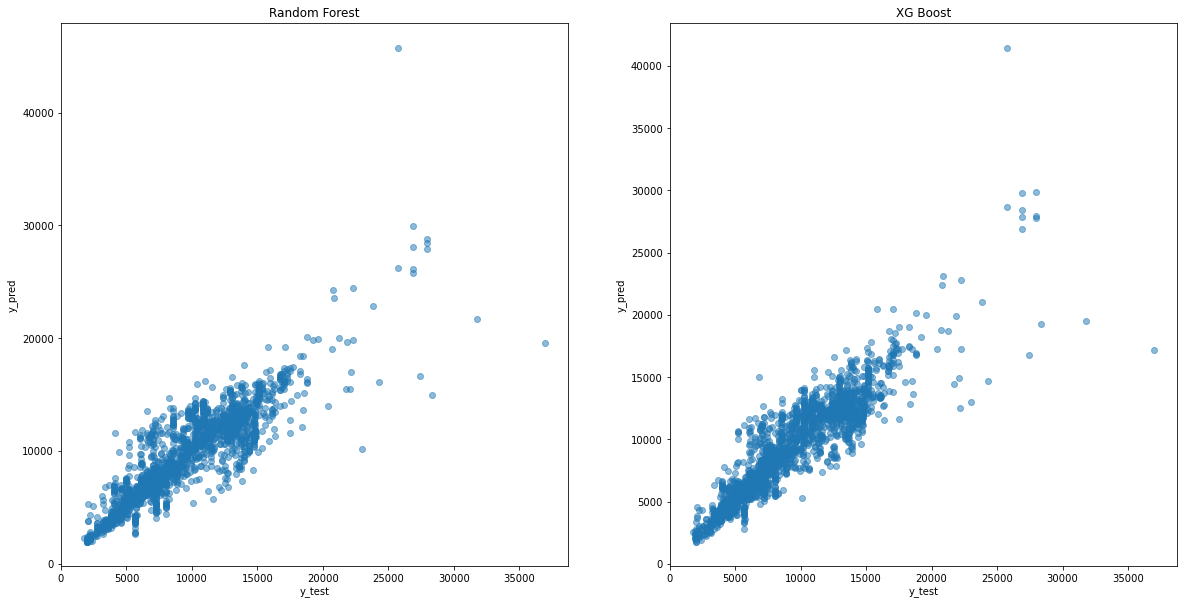

In [180]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Random Forest")
plt.scatter(y_test, y_pred_rf_regressor, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.subplot(1, 2, 2)
plt.title("XG Boost")
plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [182]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('RandomForest')
print('MAE:', mean_absolute_error(y_test, y_pred_rf_regressor))
print('MSE:', mean_squared_error(y_test, y_pred_rf_regressor))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf_regressor)))

print('XGBoost')
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

RandomForest
MAE: 1189.7611493254703
MSE: 3725015.6427716766
RMSE: 1930.0299590347495
XGBoost
MAE: 1153.9199335850674
MSE: 3057272.313367059
RMSE: 1748.5057372988683


Observation: From the above performance metrics we can see that XGBRegressor outperforms Random Forest

In [184]:
# Hyperparameter tuning
# In this project I am using RandomizedSearchCV , we can also use GridSearchCv
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [185]:
rand= RandomizedSearchCV(estimator = xgb, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=22, n_jobs =-1)
rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          reg_lambda=1, scale_pos_weight=1,
                                          subsample=1, tree_method='exac

In [186]:
rand.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [187]:
pred_y=rand.predict(X_test)

Text(0, 0.5, 'y_pred')

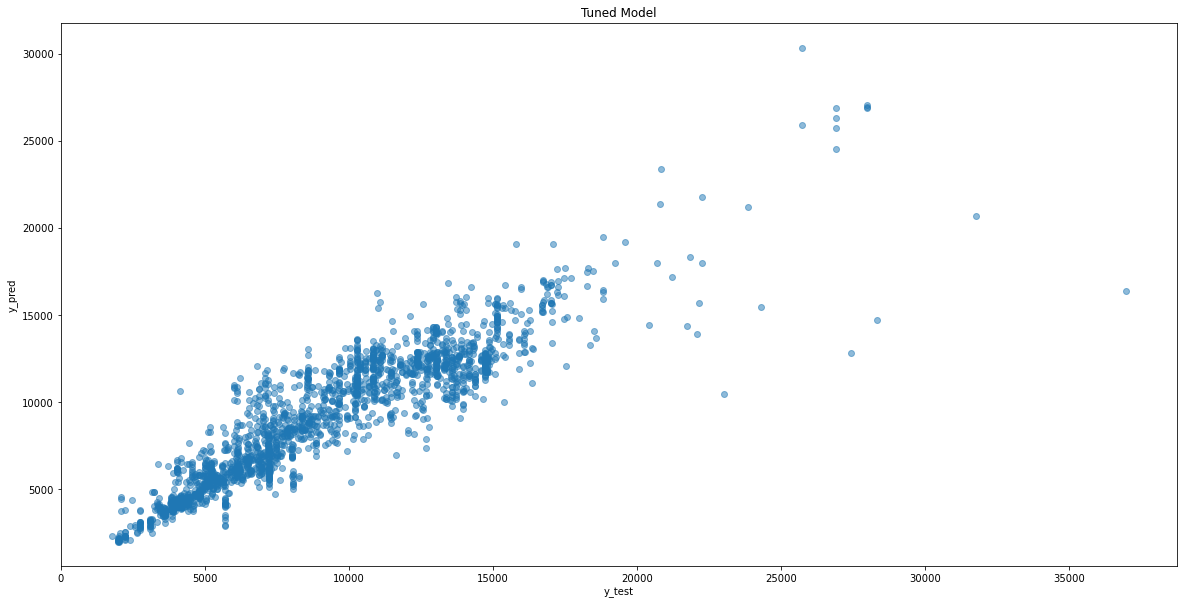

In [188]:
plt.figure(figsize=(20,10))
plt.title("Tuned Model")
plt.scatter(y_test, pred_y, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [189]:
print('MAE:', mean_absolute_error(y_test, pred_y))
print('MSE:', mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_y)))

MAE: 1147.577829849179
MSE: 2978438.973695178
RMSE: 1725.81545180682


In [190]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred_y))

0.8398215294045361


Observation: The MAE,MSE,RMSE for the tuned model is better than XGboost Regressor

# Saving the model for reusing

In [191]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb') # wb is write and binary mode

# dump information to that file
pickle.dump(rand, file)